# MODEL GROW AND REMODELING SOFT TISSUE 
**Constrained mixture model (CMM) with mechanical feedback and various deformation protocols.**

The theory is taken from Larry Taber "Continuum Modeling in Mechanobiology" (Chapter 7, paragraph 7.4.3.) https://link.springer.com/book/10.1007/978-3-030-43209-6

Before that, I believed that the rate of production of new fibers depends only on time, but in life, the processes of growth and remodeling are controlled by the internal stress of the system. 
According to a number of experimental data, collagen synthesis increases with increasing applied loads. 
As a phenomenological law of remodeling, taking into account this fact, I will use the following ratio for the rate of fiber production:

\begin{align*}
    j^{n+}(t)=\frac{J^n(t)}{J^n(0)}  j_0^{n+}[1+K^{n+}\cdot(\hat{\boldsymbol{\sigma}}-1)]
\end{align*}

where
\begin{align*}
    \hat{\boldsymbol{\sigma}} = \frac{\boldsymbol{\sigma}^n}{\boldsymbol{\sigma}_0^n},   
\end{align*}

and $\sigma_0^n$ a kind of homeostatic tension for $n$ fiber families, $j_0^{n+}$ a positive constant.

Taking into account the new law for the rate of production of new fibers, I obtain the following system of Volterra integral equations of the second kind for fiber tension and partial volume of collagen:

\begin{equation*}
    \begin{cases}
       &\displaystyle \boldsymbol{\sigma}_x^c(t) = \frac{J^c(0)}{J(0)}\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(0, 0))q^c(0, 0) +
       \frac{1}{J(t)} \int\limits_0^t J^c(\tau) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(t, \tau))q(t, \tau) d\tau, \\
       &\displaystyle J^c(t) = J^c(0)q^c(0, 0) +  \int\limits_0^t J^c(\tau) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]q(t, \tau) d\tau.
    \end{cases}
\end{equation*}

At the same time, I will assume that only collagen synthesis obeys the feedback law, the law of growth and remodeling for elastin remains unchanged.

I transform the system by replacing integrals by a sum using the trapezoid method and the formula of the iterative method:

\begin{equation*}
    \begin{cases}
       &\displaystyle \boldsymbol{\sigma}_{x[k+1]}^c(t_{i}) = \frac{J^c(0)}{J(0)}\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(0, 0))q^c(0, 0) +
       \frac{1}{J_{[k]}(t_i)} \cdot \frac{h}{2} \sum_{j=1}^{N}[ J_{[k]}^c(t_i) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(t_i, t_j))q^c(t_i, t_j) + 
       J_{[k-1]}^c(t_i) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(t_i, t_{j-1}))q^c(t_i, t_{j-1})],\\
       &J_{[k+1]}^c(t_i) = J^c(0)q^c(0, 0) + \frac{h}{2} \sum_{j=1}^{N}[ J_{[k]}^c(t_i) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]q^c(t_i, t_j) + 
       J_{[k-1]}^c(t_i) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]q^c(t_i, t_{j-1})],
    \end{cases}
\end{equation*}
where $k$ - iteration number, $h$ - integration step, $t_j = jh$ for $j = 0, 1, 2, ..., N$.
As a homeostatic stress, I take
\begin{align*}
    &\boldsymbol{\sigma}^c_0 \equiv \boldsymbol{\sigma}_x^c(0) =  \frac{J^c(0)}{J(0)}\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(0, 0))q^c(0, 0)\\
    %&J^c(0) = J^c(0)q^c(0, 0)
\end{align*}
where $J^c(0) = \phi_0^c$
At each time step, the value is calculated using a simple iteration method $\sigma_x^c$ и $J^c(t)$, and after the calculation, the norm of the difference of values is considered $\|\sigma_{x[k]}^c(t_i) - \sigma_{x[k-1]}^c(t_i)\|$ и $\|J_{[k]}^c(t_i) - J_{[k-1]}^c(t_i)\|$ and if both of these values are less than the specified epsilon $(\epsilon = 10^{-4})$, then the obtained values for this time step are stored in an array and the transition to the next time step is performed and the iterative procedure is repeated, but for $t_{i+1}$. If the condition is not met, the iterative procedure is repeated until the condition is met:
\begin{align*}
\begin{cases}
   \|\boldsymbol{\sigma}_{x[k]}^c(t_i) - \boldsymbol{\sigma}_{x[k-1]}^c(t_i)\| < \epsilon \\
    \|J_{[k]}^c(t_i) - J_{[k-1]}^c(t_i)\|  < \epsilon 
\end{cases}
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

I denote constants (you can vary them) and create empty arrays for storing data

In [2]:
c_c = 1.0
c_e = 50.0
c_g = 10.0
fi0_c = 0.75
fi0_e = 0.05
fi0_g = 0.20
lambda0_c = 1.05
lambda0_e = 1.10
alpha_c = 0.01
k_cplus = 1.0
k_cminus = 1.0
k_eplus = 1.0
k_eminus = 1.0
K_cplus = 0.04
lambda_roof = 1.1
J0 = 1.0
t_end = 10
n = 100
gamma = 1.0
a = 0.2

time = np.linspace(0, t_end, n)

Jc0 = fi0_c
Je0 = fi0_e 
Jg0 = fi0_g 
j_eplus = k_eplus * Je0

sigma_c_res_linear = np.zeros(n)
J_c_vals_res_linear = np.zeros(n)
sigma_e_res_linear = np.zeros(n)
sigma_g_res_linear = np.zeros(n)
sigma_c_res_linear1 = np.zeros(n)
J_c_vals_res_linear1 = np.zeros(n)
sigma_e_res_linear1 = np.zeros(n)
sigma_g_res_linear1 = np.zeros(n)
sigma_c_res_linear2 = np.zeros(n)
J_c_vals_res_linear2 = np.zeros(n)
sigma_e_res_linear2 = np.zeros(n)
sigma_g_res_linear2 = np.zeros(n)
sigma_c_res_linear3 = np.zeros(n)
J_c_vals_res_linear3 = np.zeros(n)
sigma_e_res_linear3 = np.zeros(n)
sigma_g_res_linear3 = np.zeros(n)

sigma_c_res_const = np.zeros(n)
J_c_vals_res_const = np.zeros(n)
sigma_e_res_const = np.zeros(n)
sigma_g_res_const = np.zeros(n)
sigma_c_res_const1 = np.zeros(n)
J_c_vals_res_const1 = np.zeros(n)
sigma_e_res_const1 = np.zeros(n)
sigma_g_res_const1 = np.zeros(n)
sigma_c_res_const2 = np.zeros(n)
J_c_vals_res_const2 = np.zeros(n)
sigma_e_res_const2 = np.zeros(n)
sigma_g_res_const2 = np.zeros(n)
sigma_c_res_const3 = np.zeros(n)
J_c_vals_res_const3 = np.zeros(n)
sigma_e_res_const3 = np.zeros(n)
sigma_g_res_const3 = np.zeros(n)

sigma_c_res_cicle = np.zeros(n)
sigma_e_res_cicle = np.zeros(n)
sigma_g_res_cicle = np.zeros(n)
J_c_vals_res_cicle = np.zeros(n)
sigma_c_res_cicle1 = np.zeros(n)
sigma_e_res_cicle1 = np.zeros(n)
sigma_g_res_cicle1 = np.zeros(n)
J_c_vals_res_cicle1 = np.zeros(n)
sigma_c_res_cicle2 = np.zeros(n)
sigma_e_res_cicle2 = np.zeros(n)
sigma_g_res_cicle2 = np.zeros(n)
J_c_vals_res_cicle2 = np.zeros(n)
sigma_c_res_cicle3 = np.zeros(n)
sigma_e_res_cicle3 = np.zeros(n)
sigma_g_res_cicle3 = np.zeros(n)
J_c_vals_res_cicle3 = np.zeros(n)

result_val_sigma_linear = np.zeros(n)
result_val_sigma1_linear = np.zeros(n)
result_val_sigma2_linear = np.zeros(n)
result_val_sigma3_linear = np.zeros(n)
result_val_sigma_const = np.zeros(n)
result_val_sigma1_const = np.zeros(n)
result_val_sigma2_const = np.zeros(n)
result_val_sigma3_const = np.zeros(n)
result_val_sigma_cicle = np.zeros(n)
result_val_sigma1_cicle = np.zeros(n)
result_val_sigma2_cicle = np.zeros(n)
result_val_sigma3_cicle = np.zeros(n)

sigma_c = np.zeros(n)
J_c_vals = np.zeros(n)
sigma_c1 = np.zeros(n)
J_c_vals1 = np.zeros(n)
sigma_c2 = np.zeros(n)
J_c_vals2 = np.zeros(n)
sigma_c3 = np.zeros(n)
J_c_vals3 = np.zeros(n)


\begin{align*}
    \begin{cases}
        &\displaystyle \boldsymbol{\sigma} = \boldsymbol{\sigma}_x^c + \boldsymbol{\sigma}_x^e + \boldsymbol{\sigma}_x^g,\\
        &\displaystyle \boldsymbol{\sigma}_x^c(t_{k+1}) = \frac{J^c(0)}{J(0)}\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(0, 0))q^c(0, 0) +
        \frac{1}{J(t_k)} \cdot \frac{h}{2} \sum_{k=1}^{N}[ J^c(t_k) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(t, t_k))q^c(t, t_k) + 
        J^c(t_{k-1}) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(t, t_{k-1}))q^c(t, t_{k-1})],\\
       &\displaystyle J^c(t_{k+1}) = J^c(0)q^c(0, 0) + \frac{h}{2} \sum_{k=1}^{N}[ J^c(t_k) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]q^c(t, t_k) + 
       J^c(t_{k-1}) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]q^c(t, t_{k-1})],\\
       &\displaystyle \boldsymbol{\sigma}_x^e(t) = \frac{J^e(0)}{J(0)}\bar{\boldsymbol{\sigma}_x^e}(\lambda_x^{e*}(t, 0))q^e(t, 0) + \frac{j^{e+}}{J(t)} \int\limits_0^t \bar{\boldsymbol{\sigma}_x^e}(\lambda_x^{e*}(t, \tau))q^e(t, \tau) d\tau,\\
       &\displaystyle \boldsymbol{\sigma}_x^g(t) = 2\phi^g c_g(\hat{\lambda}(1 + at)^2 - \frac{1}{\hat{\lambda}(1 + at)}),\\
       &\displaystyle \bar{\boldsymbol{\sigma}}_x^c = 4c_c(\lambda_x^{c*})^2[(\lambda_x^{c*})^2 - 1]e^{\alpha_c [(\lambda_x^{c*})^2 - 1]^2},\\
       &\displaystyle \bar{\boldsymbol{\sigma}}_x^e = 4c_e(\lambda_x^{e*})^2[(\lambda_x^{e*})^2 - 1], \\
       &\displaystyle \lambda_x^{c*}(t, \tau) = \lambda_{0}^c \frac{(1 + at)}{(1 + a\tau)}\frac{G_x^c(t)}{G_x^c(\tau)},\\
       &\displaystyle \lambda_x^{e*}(t, \tau) = \lambda_{0}^e \frac{(1 + at)}{(1 + a\tau)}\frac{G_x^e(t)}{G_x^e(\tau)}.
    \end{cases}
\end{align*}

In [3]:
def calc_sigma_and_j_linear(k_cminus, k_cplus, k_eplus, k_eminus, K_cplus, time):
    for i in range(1, n):
        t = time[i]
        dt = time[i] - time[i - 1]
        sigma_e_res = np.zeros(n)
        sigma_g_res = np.zeros(n)
        def J(t):
            return J_c_vals[i - 1] + J_e(t) + Jg0

        def Gx_c(t):
            return (J_c_vals[i - 1])**(1.0 / (1.0 + (2.0 * gamma)))

        def q_c(tau, t):
            return np.exp(-k_cminus * (t - tau))

        def q_e(tau, t):
            return np.exp(-k_eminus * (t - tau))

        def Q_c(t):
            if k_cminus == 0 and k_cplus == 0:
                return np.exp(-k_cminus * t)
            else:
                return np.exp(-k_cminus * t) + (k_cplus / k_cminus) * (1.0 - np.exp(-k_cminus * t))

        def Q_e(t):
            if k_eminus == 0 and k_eplus == 0:
                return np.exp(-k_eminus * t)
            else:
                return np.exp(-k_eminus * t) + (k_eplus / k_eminus) * (1.0 - np.exp(-k_eminus * t))

        def J_c(t):
            return Jc0 * Q_c(t)

        def J_e(t):
            return Je0 * Q_e(t)
                                
        def Gx_e(t):
            return (J_e(t))**(1.0 / (1.0 + (2.0 * gamma)))

        def lambda_cx(tau, t):
            return lambda0_c * ((1 + a * t)/(1 + a * tau))* (Gx_c(tau) / Gx_c(t))

        def lambda_ex(tau, t):
            return lambda0_e * ((1 + a * t)/(1 + a * tau))* (Gx_e(tau) / Gx_e(t))

        def fi_g(t):
            return Jg0 / J(t)

        def sigma_g(t):
            if t == 0:
                return 2.0 * c_g * Jg0 / J0 * (((lambda_roof * (1 + a * t))** 2.0) - 1.0) / ((lambda_roof * (1 + a * t)))
            else:
                return 2.0 * c_g * fi_g(t) * (((lambda_roof * (1 + a * t))** 2.0) - 1.0) / ((lambda_roof * (1 + a * t)))

        def sigma_c_x_roof(tau, t):
            return 4.0 * c_c * ((lambda_cx(tau, t))**2.0) * (((lambda_cx(tau, t))**2.0) - 1.0) * np.exp(alpha_c * ((((lambda_cx(tau, t))**2.0) - 1.0) ** 2.0))


        def sigma_e_x_roof(tau, t):
            return 4.0 * c_e * ((lambda_ex(tau, t))**2.0) * (((lambda_ex(tau, t))**2.0) - 1.0)


        def integral_e(tau, t):
            return sigma_e_x_roof(tau, t) * q_e(tau, t)


        def result_int_e(t):
            resulte, _ = integrate.quad(integral_e, 0, t, args=(t))
            return resulte

        def sigma_e(t):
            return Je0 / J0 * sigma_e_x_roof(0, t) * q_e(0, t) + ((j_eplus) / J(t)) * result_int_e(t)

        sigma_c[0] = (Jc0 / J0) * sigma_c_x_roof(0, 0) * q_c(0, 0)  
        J_c_vals[0] = Jc0  
        eps = 1e-4
        num_iterations = 0
        max_iterat = 20
   

        integrand_sigma = [J_c_vals[j] * k_cplus * (1 + K_cplus * (sigma_c[i-1]/sigma_c[0] - 1)) * sigma_c_x_roof(time[j], t) * q_c(time[j], t) for j in range(i)]
        integral_sigma = np.trapz(integrand_sigma, time[:i])

        integrand_J = [J_c_vals[j] * k_cplus * (1 + K_cplus * (sigma_c[i-1]/sigma_c[0] - 1)) * q_c(time[j], t) for j in range(i)]
        integral_J = np.trapz(integrand_J, time[:i])

       
        new_sigma_c = (Jc0 / J0) * sigma_c_x_roof(0, t) * q_c(0, t) + (1 / J(t)) * integral_sigma
        new_J_c = Jc0 * q_c(0, t) + integral_J
        if np.linalg.norm(sigma_c[i] - sigma_c[i-1]) < eps and np.linalg.norm(J_c_vals[i] - J_c_vals[i-1]) < eps or num_iterations > max_iterat:
           
            sigma_c[i] = new_sigma_c
            J_c_vals[i] = new_J_c
            break
        else:
          
            sigma_c[i] = new_sigma_c
            J_c_vals[i] = new_J_c
            num_iterations += 1
        for k in range(n):
            sigma_e_r = sigma_e(t)
            sigma_e_res[k] = sigma_e_r
            sigma_g_r = sigma_g(t)
            sigma_g_res[k] = sigma_g_r 
    return sigma_c, J_c_vals, sigma_e_res, sigma_g_res


\begin{equation*}
    \begin{cases}
        &\displaystyle \boldsymbol{\sigma} = \boldsymbol{\sigma}_x^c + \boldsymbol{\sigma}_x^e + \boldsymbol{\sigma}_x^g,\\
        &\displaystyle \boldsymbol{\sigma}_x^c(t_{k+1}) = \frac{J^c(0)}{J(0)}\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(0, 0))q^c(0, 0) + 
        \frac{1}{J(t_k)} \cdot \frac{h}{2} \sum_{k=1}^{N}[ J^c(t_k) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(t, t_k))q^c(t, t_k) + 
        J^c(t_{k-1}) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(t, t_{k-1}))q^c(t, t_{k-1})],\\
       &\displaystyle J^c(t_{k+1}) = J^c(0)q(0, 0) + \frac{h}{2} \sum_{k=1}^{N}[ J^c(t_k) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]q^c(t, t_k) + 
       J^c(t_{k-1}) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]q^c(t, t_{k-1})],\\
       &\displaystyle \boldsymbol{\sigma}_x^e(t) = \frac{J^e(0)}{J(0)}\bar{\boldsymbol{\sigma}_x^e}(\lambda_x^{e*}(t, 0))q^e(t, 0) + \frac{j^{e+}}{J(t)} \int\limits_0^t \bar{\boldsymbol{\sigma}_x^e}(\lambda_x^{e*}(t, \tau))q^e(t, \tau) d\tau,\\
       &\displaystyle \boldsymbol{\sigma}_x^g(t) = 2\phi^g c_g\left(\hat{\lambda}^2 - \frac{1}{\hat{\lambda}}\right),\\
       &\displaystyle \bar{\boldsymbol{\sigma}}_x^c = 4c_c(\lambda_x^{c*})^2[(\lambda_x^{c*})^2 - 1]e^{\alpha_c [(\lambda_x^{c*})^2 - 1]^2},\\
       &\displaystyle \bar{\boldsymbol{\sigma}}_x^e = 4c_e(\lambda_x^{e*})^2[(\lambda_x^{e*})^2 - 1],\\
       &\displaystyle \lambda_x^{c*}(t, \tau) = \lambda_{0}^c \frac{G_x^c(t)}{G_x^c(\tau)},\\
       &\displaystyle \lambda_x^{c*}(t, \tau) = \lambda_{0}^c \frac{G_x^c(t)}{G_x^c(\tau)}.
    \end{cases}
\end{equation*}

In [4]:
def calc_sigma_and_j_constant(k_cminus, k_cplus, k_eplus, k_eminus, K_cplus, time):
    for i in range(1, n):
        t = time[i]
        dt = time[i] - time[i - 1]
        sigma_e_res1 = np.zeros(n)
        sigma_g_res1 = np.zeros(n)

        def J(t):
            return J_c_vals1[i - 1] + J_e(t) + Jg0

        def Gx_c(t):
            return (J_c_vals1[i - 1])**(1.0 / (1.0 + (2.0 * gamma)))

        def q_c(tau, t):
            return np.exp(-k_cminus * (t - tau))

        def q_e(tau, t):
            return np.exp(-k_eminus * (t - tau))

        def Q_c(t):
            if k_cminus == 0 and k_cplus == 0:
                return np.exp(-k_cminus * t)
            else:
                return np.exp(-k_cminus * t) + (k_cplus / k_cminus) * (1.0 - np.exp(-k_cminus * t))

        def Q_e(t):
            if k_eminus == 0 and k_eplus == 0:
                return np.exp(-k_eminus * t)
            else:
                return np.exp(-k_eminus * t) + (k_eplus / k_eminus) * (1.0 - np.exp(-k_eminus * t))

        def J_c(t):
            return Jc0 * Q_c(t)

        def J_e(t):
            return Je0 * Q_e(t)
                                
        def Gx_e(t):
            return (J_e(t))**(1.0 / (1.0 + (2.0 * gamma)))

        def lambda_cx(tau, t):
            return lambda0_c *(Gx_c(tau) / Gx_c(t))

        def lambda_ex(tau, t):
            return lambda0_e * (Gx_e(tau) / Gx_e(t))

        def fi_g(t):
            return Jg0 / J(t)

        def sigma_g(t):
            if t == 0:
                return 2.0 * c_g * Jg0 / J0 * (((lambda_roof )** 2.0) - 1.0) / (lambda_roof )
            else:
                return 2.0 * c_g * fi_g(t) * (((lambda_roof )** 2.0) - 1.0) / (lambda_roof )

        def sigma_c_x_roof(tau, t):
            return 4.0 * c_c * ((lambda_cx(tau, t))**2.0) * (((lambda_cx(tau, t))**2.0) - 1.0) * np.exp(alpha_c * ((((lambda_cx(tau, t))**2.0) - 1.0) ** 2.0))


        def sigma_e_x_roof(tau, t):
            return 4.0 * c_e * ((lambda_ex(tau, t))**2.0) * (((lambda_ex(tau, t))**2.0) - 1.0)


        def integral_e(tau, t):
            return sigma_e_x_roof(tau, t) * q_e(tau, t)


        def result_int_e(t):
            resulte, _ = integrate.quad(integral_e, 0, t, args=(t))
            return resulte

        def sigma_e(t):
            return Je0 / J0 * sigma_e_x_roof(0, t) * q_e(0, t) + ((j_eplus) / J(t)) * result_int_e(t)

        sigma_c1[0] = (Jc0 / J0) * sigma_c_x_roof(0, 0) * q_c(0, 0)  
        J_c_vals1[0] = Jc0  
        eps = 1e-4
        num_iterations = 0
        max_iterat = 20
    

        integrand_sigma1 = [J_c_vals1[j] * k_cplus * (1 + K_cplus * (sigma_c1[i-1]/sigma_c1[0] - 1)) * sigma_c_x_roof(time[j], t) * q_c(time[j], t) for j in range(i)]
        integral_sigma1 = np.trapz(integrand_sigma1, time[:i])

        integrand_J1 = [J_c_vals1[j] * k_cplus * (1 + K_cplus * (sigma_c1[i-1]/sigma_c1[0] - 1)) * q_c(time[j], t) for j in range(i)]
        integral_J1 = np.trapz(integrand_J1, time[:i])

        new_sigma_c1 = (Jc0 / J0) * sigma_c_x_roof(0, t) * q_c(0, t) + (1 / J(t)) * integral_sigma1
        new_J_c1 = Jc0 * q_c(0, t) + integral_J1
        if np.linalg.norm(sigma_c1[i] - sigma_c1[i-1]) < eps and np.linalg.norm(J_c_vals1[i] - J_c_vals1[i-1]) < eps or num_iterations > max_iterat:
        
            sigma_c1[i] = new_sigma_c1
            J_c_vals1[i] = new_J_c1
            break
        else:
           
            sigma_c1[i] = new_sigma_c1
            J_c_vals1[i] = new_J_c1
            num_iterations += 1
        for k in range(n):
            sigma_e_r1 = sigma_e(t)
            sigma_e_res1[k] = sigma_e_r1
            sigma_g_r1 = sigma_g(t)
            sigma_g_res1[k] = sigma_g_r1 
    return sigma_c1, J_c_vals1, sigma_e_res1, sigma_g_res1

\begin{equation*}
    \begin{cases}
        &\displaystyle \boldsymbol{\sigma} = \boldsymbol{\sigma}_x^c + \boldsymbol{\sigma}_x^e + \boldsymbol{\sigma}_x^g,\\
        &\displaystyle \boldsymbol{\sigma}_x^c(t_{k+1}) = \frac{J^c(0)}{J(0)}\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(0, 0))q^c(0, 0) + 
        \frac{1}{J(t_k)} \cdot \frac{h}{2} \sum_{k=1}^{N}[ J^c(t_k) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(t, t_k))q^c(t, t_k) +
        J^c(t_{k-1}) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(t, t_{k-1}))q^c(t, t_{k-1})],\\
       &\displaystyle J^c(t_{k+1}) = J^c(0)q^c(0, 0) + \frac{h}{2} \sum_{k=1}^{N}[ J^c(t_k) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]q^c(t, t_k) + 
       J^c(t_{k-1}) k^{c+}[1 + K^{c+}(\hat{\boldsymbol{\sigma}} - 1)]q^c(t, t_{k-1})],\\
       &\displaystyle \boldsymbol{\sigma}_x^e(t) = \frac{J^e(0)}{J(0)}\bar{\boldsymbol{\sigma}_x^e}(\lambda_x^{e*}(t, 0))q^e(t, 0) + \frac{j^{e+}}{J(t)} \int\limits_0^t \bar{\boldsymbol{\sigma}_x^e}(\lambda_x^{e*}(t, \tau))q^e(t, \tau) d\tau,\\
       &\displaystyle \boldsymbol{\sigma}_x^g(t) = 2\phi^g c_g\left(\hat{\lambda}((1 + a\sin{(\pi t)}^2))^2 - \frac{1}{\hat{\lambda}(1 + a\sin{(\pi t)}^2)}\right),\\
       &\displaystyle \bar{\boldsymbol{\sigma}}_x^c = 4c_c(\lambda_x^{c*})^2[(\lambda_x^{c*})^2 - 1]e^{\alpha_c [(\lambda_x^{c*})^2 - 1]^2}, \\
       &\displaystyle\bar{\boldsymbol{\sigma}}_x^e = 4c_e(\lambda_x^{e*})^2[(\lambda_x^{e*})^2 - 1], \\
       &\displaystyle \lambda_x^{c*}(t, \tau) = \lambda_{0}^c \frac{(1 + a\sin{(\pi t)}^2)}{(1 + a\sin{(\pi \tau)}^2)}\frac{G_x^c(t)}{G_x^c(\tau)}, \\
       &\displaystyle \lambda_x^{e*}(t, \tau) = \lambda_{0}^e \frac{(1 + a\sin{(\pi t)}^2)}{(1 + a\sin{(\pi \tau)}^2)}\frac{G_x^e(t)}{G_x^e(\tau)}.
    \end{cases}
\end{equation*}

In [5]:
def calc_sigma_and_j_cicle(k_cminus, k_cplus, k_eplus, k_eminus, K_cplus, time):
    for i in range(1, n):
        t = time[i]
        dt = time[i] - time[i - 1]
        sigma_e_res2 = np.zeros(n)
        sigma_g_res2 = np.zeros(n)

        def J(t):
            return J_c_vals2[i - 1] + J_e(t) + Jg0

        def Gx_c(t):
            return (J_c_vals2[i - 1])**(1.0 / (1.0 + (2.0 * gamma)))

        def q_c(tau, t):
            return np.exp(-k_cminus * (t - tau))

        def q_e(tau, t):
            return np.exp(-k_eminus * (t - tau))

        def Q_c(t):
            if k_cminus == 0 and k_cplus == 0:
                return np.exp(-k_cminus * t)
            else:
                return np.exp(-k_cminus * t) + (k_cplus / k_cminus) * (1.0 - np.exp(-k_cminus * t))

        def Q_e(t):
            if k_eminus == 0 and k_eplus == 0:
                return np.exp(-k_eminus * t)
            else:
                return np.exp(-k_eminus * t) + (k_eplus / k_eminus) * (1.0 - np.exp(-k_eminus * t))

        def J_c(t):
            return Jc0 * Q_c(t)

        def J_e(t):
            return Je0 * Q_e(t)
                                
        def Gx_e(t):
            return (J_e(t))**(1.0 / (1.0 + (2.0 * gamma)))
        def lambda_cx(tau, t):
            return lambda0_c * ((1 + a * (np.sin(np.pi * t))**2)/((1 + a * (np.sin(np.pi * tau))**2)))*(Gx_c(tau) / Gx_c(t))

        def lambda_ex(tau, t):
            return lambda0_e * ((1 + a * (np.sin(np.pi * t))**2)/((1 + a * (np.sin(np.pi * tau))**2)))*(Gx_e(tau) / Gx_e(t))

        def fi_g(t):
            return Jg0 / J(t)

        def sigma_g(t):
            if t == 0:
                return 2.0 * c_g * Jg0 / J0 * ((lambda_roof * ((1 + a * (np.sin(np.pi * t))**2))** 2.0) - 1.0) / (lambda_roof * ((1 + a * (np.sin(np.pi * t))**2)))
            else:
                return 2.0 * c_g * fi_g(t) * ((lambda_roof * ((1 + a * (np.sin(np.pi * t))**2)) ** 2.0) - 1.0) / (lambda_roof * ((1 + a * (np.sin(np.pi * t))**2)))

        def sigma_c_x_roof(tau, t):
            return 4.0 * c_c * ((lambda_cx(tau, t))**2.0) * (((lambda_cx(tau, t))**2.0) - 1.0) * np.exp(alpha_c * ((((lambda_cx(tau, t))**2.0) - 1.0) ** 2.0))


        def sigma_e_x_roof(tau, t):
            return 4.0 * c_e * ((lambda_ex(tau, t))**2.0) * (((lambda_ex(tau, t))**2.0) - 1.0)


        def integral_e(tau, t):
            return sigma_e_x_roof(tau, t) * q_e(tau, t)


        def result_int_e(t):
            resulte, _ = integrate.quad(integral_e, 0, t, args=(t))
            return resulte

        def sigma_e(t):
            return Je0 / J0 * sigma_e_x_roof(0, t) * q_e(0, t) + ((j_eplus) / J(t)) * result_int_e(t)

        sigma_c2[0] = (Jc0 / J0) * sigma_c_x_roof(0, 0) * q_c(0, 0)  
        J_c_vals2[0] = Jc0  
        eps = 1e-4
        num_iterations = 0
        max_iterat = 20
    
    
        integrand_sigma2 = [J_c_vals2[j] * k_cplus * (1 + K_cplus * (sigma_c2[i-1]/sigma_c2[0] - 1)) * sigma_c_x_roof(time[j], t) * q_c(time[j], t) for j in range(i)]
        integral_sigma2 = np.trapz(integrand_sigma2, time[:i])

        integrand_J2 = [J_c_vals2[j] * k_cplus * (1 + K_cplus * (sigma_c2[i-1]/sigma_c2[0] - 1)) * q_c(time[j], t) for j in range(i)]
        integral_J2 = np.trapz(integrand_J2, time[:i])

        
        new_sigma_c2 = (Jc0 / J0) * sigma_c_x_roof(0, t) * q_c(0, t) + (1 / J(t)) * integral_sigma2
        new_J_c2 = Jc0 * q_c(0, t) + integral_J2
        if np.linalg.norm(sigma_c2[i] - sigma_c2[i-1]) < eps and np.linalg.norm(J_c_vals2[i] - J_c_vals2[i-1]) < eps or num_iterations > max_iterat:
           
            sigma_c2[i] = new_sigma_c2
            J_c_vals2[i] = new_J_c2
            break
        else:
          
            sigma_c2[i] = new_sigma_c2
            J_c_vals2[i] = new_J_c2
            num_iterations += 1
        for k in range(n):
            sigma_e_r2 = sigma_e(t)
            sigma_e_res2[k] = sigma_e_r2
            sigma_g_r2 = sigma_g(t)
            sigma_g_res2[k] = sigma_g_r2 
    return sigma_c2, J_c_vals2, sigma_e_res2, sigma_g_res2

In [6]:
sigma_c_res_linear, J_c_vals_res_linear, sigma_e_res_linear, sigma_g_res_linear = calc_sigma_and_j_linear(k_cminus=1.0, k_cplus=1.0, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)
sigma_c_res_cicle, J_c_vals_res_cicle, sigma_e_res_cicle, sigma_g_res_cicle = calc_sigma_and_j_cicle(k_cminus=1.0, k_cplus=1.0, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)
sigma_c_res_const, J_c_vals_res_const, sigma_e_res_const, sigma_g_res_const = calc_sigma_and_j_constant(k_cminus=1.0, k_cplus=1.0, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)

C:\Users\Карина\AppData\Local\Temp\ipykernel_14620\15883123.py:41: RuntimeWarning: invalid value encountered in scalar divide
  return lambda0_c * ((1 + a * t)/(1 + a * tau))* (Gx_c(tau) / Gx_c(t))
C:\Users\Карина\AppData\Local\Temp\ipykernel_14620\3028905500.py:42: RuntimeWarning: invalid value encountered in scalar divide
  return lambda0_c *(Gx_c(tau) / Gx_c(t))


In [7]:
result_val_sigma_cicle = sigma_c_res_cicle + sigma_e_res_cicle + sigma_g_res_cicle
result_val_sigma_linear = sigma_c_res_linear + sigma_e_res_linear + sigma_g_res_linear
result_val_sigma_const = sigma_c_res_const + sigma_e_res_const + sigma_g_res_const

In [8]:
sigma_c_res_linear1, J_c_vals_res_linear1, sigma_e_res_linear1, sigma_g_res_linear1 = calc_sigma_and_j_linear(k_cminus=1.5, k_cplus=1.0, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)
sigma_c_res_cicle1, J_c_vals_res_cicle1, sigma_e_res_cicle1, sigma_g_res_cicle1 = calc_sigma_and_j_cicle(k_cminus=1.5, k_cplus=1.0, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)
sigma_c_res_const1, J_c_vals_res_const1, sigma_e_res_const1, sigma_g_res_const1 = calc_sigma_and_j_constant(k_cminus=1.5, k_cplus=1.0, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)

In [9]:
result_val_sigma1_cicle = sigma_c_res_cicle1 + sigma_e_res_cicle1 + sigma_g_res_cicle1
result_val_sigma1_linear = sigma_c_res_linear1 + sigma_e_res_linear1 + sigma_g_res_linear1
result_val_sigma1_const = sigma_c_res_const1 + sigma_e_res_const1 + sigma_g_res_const1

In [10]:
sigma_c_res_linear2, J_c_vals_res_linear2, sigma_e_res_linear2, sigma_g_res_linear2 = calc_sigma_and_j_linear(k_cminus=0.5, k_cplus=1.0, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)
sigma_c_res_cicle2, J_c_vals_res_cicle2, sigma_e_res_cicle2, sigma_g_res_cicle2 = calc_sigma_and_j_cicle(k_cminus=0.5, k_cplus=1.0, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)
sigma_c_res_const2, J_c_vals_res_const2, sigma_e_res_const2, sigma_g_res_const2 = calc_sigma_and_j_constant(k_cminus=0.5, k_cplus=1.0, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)

In [11]:
result_val_sigma2_cicle = sigma_c_res_cicle2 + sigma_e_res_cicle2 + sigma_g_res_cicle2
result_val_sigma2_linear = sigma_c_res_linear2 + sigma_e_res_linear2 + sigma_g_res_linear2
result_val_sigma2_const = sigma_c_res_const2 + sigma_e_res_const2 + sigma_g_res_const2

In [12]:
sigma_c_res_linear3, J_c_vals_res_linear3, sigma_e_res_linear3, sigma_g_res_linear3 = calc_sigma_and_j_linear(k_cminus=1.5, k_cplus=1.5, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)
sigma_c_res_cicle3, J_c_vals_res_cicle3, sigma_e_res_cicle3, sigma_g_res_cicle3 = calc_sigma_and_j_cicle(k_cminus=1.5, k_cplus=1.5, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)
sigma_c_res_const3, J_c_vals_res_const3, sigma_e_res_const3, sigma_g_res_const3 = calc_sigma_and_j_constant(k_cminus=1.5, k_cplus=1.5, k_eminus=1.0, k_eplus=1.0, K_cplus=0.04, time=time)

In [13]:
result_val_sigma3_cicle = sigma_c_res_cicle3 + sigma_e_res_cicle3 + sigma_g_res_cicle3
result_val_sigma3_linear = sigma_c_res_linear3 + sigma_e_res_linear3 + sigma_g_res_linear3
result_val_sigma3_const = sigma_c_res_const3 + sigma_e_res_const3 + sigma_g_res_const3

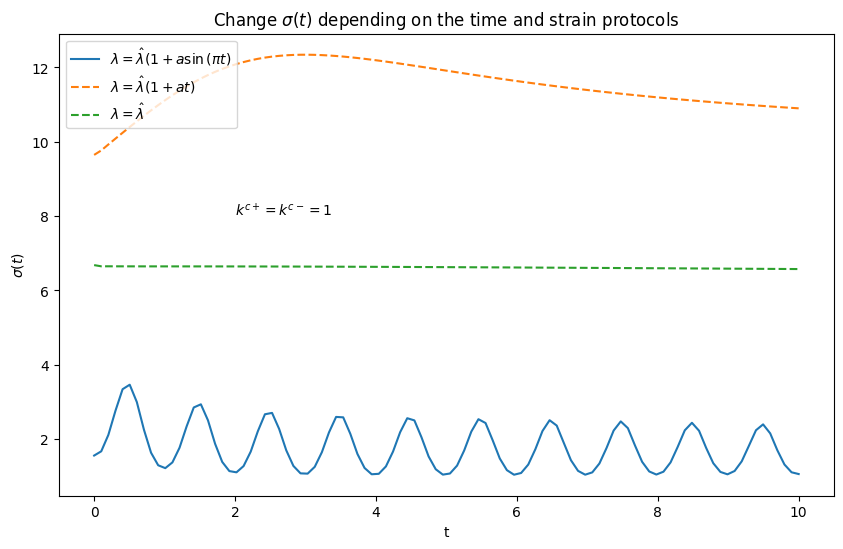

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(time, result_val_sigma_cicle, label=r'$\lambda = \hat{\lambda}(1 + a\sin{(\pi t)}$')
plt.plot(time, result_val_sigma_linear, '--', label=r'$\lambda = \hat{\lambda}(1 + at)$')
plt.plot(time, result_val_sigma_const,'--', label=r'$\lambda = \hat{\lambda}$')
plt.text(2, 8, r'$k^{c+} = k^{c-} = 1$')
plt.xlabel('t')
plt.ylabel(r'$\sigma(t)$')
plt.title('Change $\sigma(t)$ depending on the time and strain protocols')
plt.legend()
plt.show()

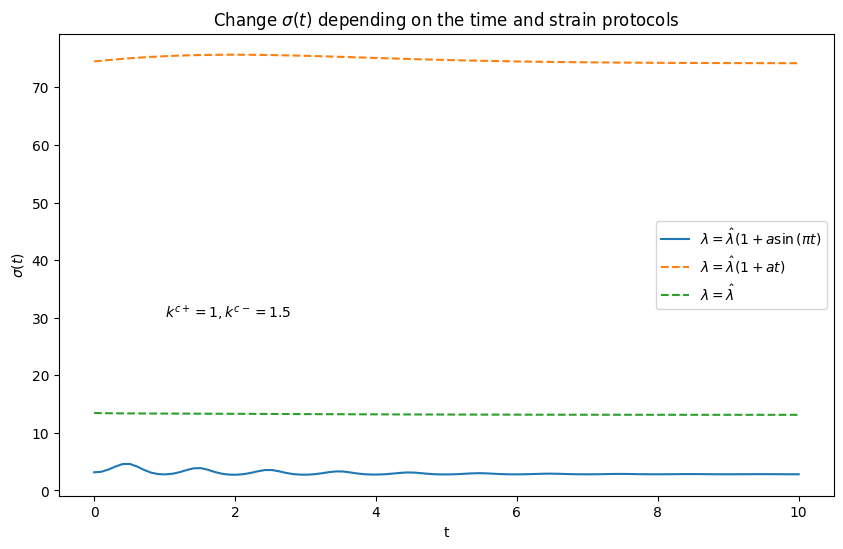

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(time, result_val_sigma1_cicle, label=r'$\lambda = \hat{\lambda}(1 + a\sin{(\pi t)}$')
plt.plot(time, result_val_sigma1_linear, '--', label=r'$\lambda = \hat{\lambda}(1 + at)$')
plt.plot(time, result_val_sigma1_const,'--', label=r'$\lambda = \hat{\lambda}$')
plt.text(1, 30, r'$k^{c+} = 1, k^{c-} = 1.5$')
plt.xlabel('t')
plt.ylabel(r'$\sigma(t)$')
plt.title('Change $\sigma(t)$ depending on the time and strain protocols')
plt.legend()
plt.show()

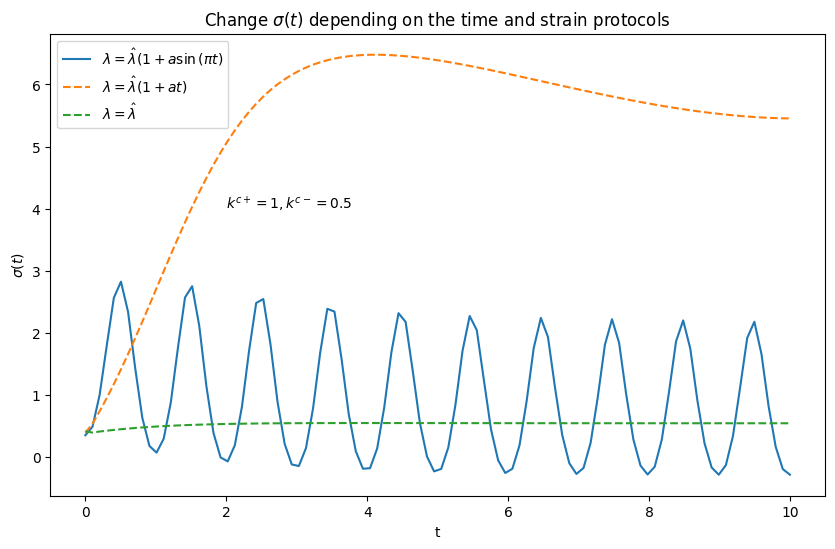

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(time, result_val_sigma2_cicle, label=r'$\lambda = \hat{\lambda}(1 + a\sin{(\pi t)}$')
plt.plot(time, result_val_sigma2_linear, '--', label=r'$\lambda = \hat{\lambda}(1 + at)$')
plt.plot(time, result_val_sigma2_const,'--', label=r'$\lambda = \hat{\lambda}$')
plt.text(2, 4, r'$k^{c+} = 1, k^{c-} = 0.5$')
plt.xlabel('t')
plt.ylabel(r'$\sigma(t)$')
plt.title('Change $\sigma(t)$ depending on the time and strain protocols')
plt.legend()
plt.show()

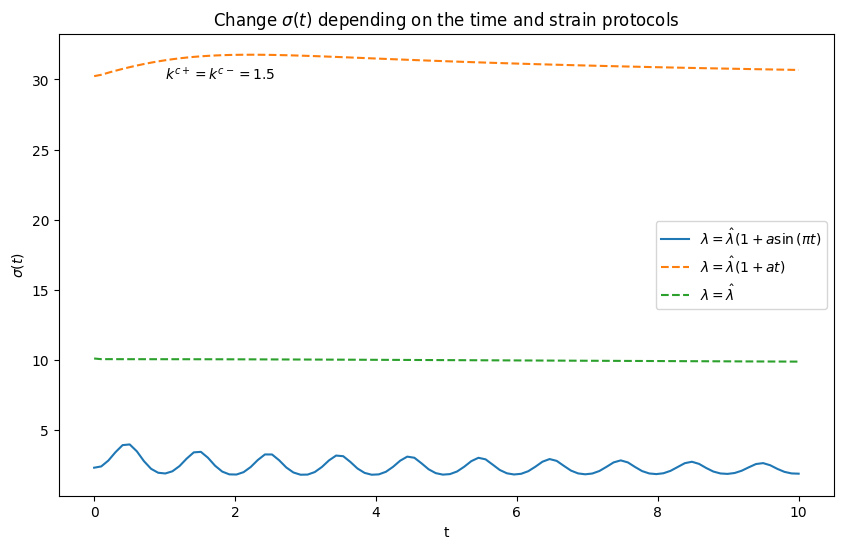

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(time, result_val_sigma3_cicle, label=r'$\lambda = \hat{\lambda}(1 + a\sin{(\pi t)}$')
plt.plot(time, result_val_sigma3_linear, '--', label=r'$\lambda = \hat{\lambda}(1 + at)$')
plt.plot(time, result_val_sigma3_const,'--', label=r'$\lambda = \hat{\lambda}$')
plt.text(1, 30, r'$k^{c+} = k^{c-} = 1.5$')
plt.ylabel(r'$\sigma(t)$')
plt.xlabel('t')
plt.title('Change $\sigma(t)$ depending on the time and strain protocols')
plt.legend()
plt.show()

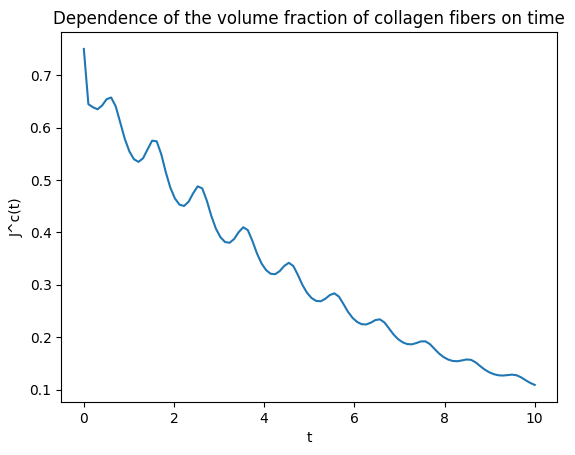

In [18]:
plt.plot(time, J_c_vals_res_cicle1, label = 'the number of collagen fibers')
plt.xlabel('t')
plt.ylabel(r'J^c(t)')
plt.title('Dependence of the volume fraction of collagen fibers on time')
plt.show()